In [1]:
from astropy.io import fits, ascii
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18
import numpy as np
import tqdm
from astropy.coordinates import SpectralCoord
from astropy.table import Table
import matplotlib.pyplot as plt

In [2]:
catalog = ascii.read('/home/manth145/data/Merger_Ionization_State/SDSS_DR17_Matched_Information.csv', format='csv')
cleaned_catalog = catalog[np.where((catalog['clean']==1) & (catalog['type']==3))]
redshift_cut = cleaned_catalog[np.where((cleaned_catalog['z']>=0.01) & (cleaned_catalog['z']<=0.055))]
mass_cut = redshift_cut[np.where(redshift_cut['logMass']>=8.5)]

primary_catalog = mass_cut[np.where((mass_cut['oiii_5007_flux']/mass_cut['oiii_5007_flux_err']>=3) 
                                    & ((mass_cut['oii_3726_flux']/mass_cut['oii_3726_flux_err']>=3)))]
secondary_catalog = redshift_cut[np.where(redshift_cut['logMass']>=8)]

/tmp/ipykernel_404315/2973176725.py:6: RuntimeWarning: invalid value encountered in true_divide
  primary_catalog = mass_cut[np.where((mass_cut['oiii_5007_flux']/mass_cut['oiii_5007_flux_err']>=3)
/tmp/ipykernel_404315/2973176725.py:7: RuntimeWarning: invalid value encountered in true_divide
  & ((mass_cut['oii_3726_flux']/mass_cut['oii_3726_flux_err']>=3)))]


In [3]:
pair_catalog = ascii.read('./pair_catalog.csv', format='csv')

In [4]:
print(secondary_catalog.colnames)

['modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z', 'ra', 'dec', 'z', 'ObjID', 'mode', 'type', 'clean', 'specObjID', 'Flux_OIII_4958', 'Flux_OIII_4958_Err', 'FLux_OIII_5006', 'FLux_OIII_5006_Err', 'Flux_OII_3726', 'Flux_OII_3726_Err', 'Flux_OII_3728', 'Flux_OII_3728_Err', 'oiii_4959_flux', 'oiii_4959_flux_err', 'oiii_5007_flux', 'oiii_5007_flux_err', 'oii_3729_flux', 'oii_3729_flux_err', 'oii_3726_flux', 'oii_3726_flux_err', 'logMass', 'metallicity', 'age', 'ssfr', 'Column1', 'minlogMass', 'maxLogMass', 'SFR', 'minSFR', 'maxSFR', 'Column2']


In [6]:
pair_catalog[np.where(pair_catalog['mass_ratio']<=0.6)]

primary_ObjID,secondary_ObjID,primary_z,secondary_z,proj_sep,rel_velocity,mass_ratio
int64,int64,float64,float64,float64,float64,float64
1237667212133925065,1237667212133925062,0.04722245,0.04972643,32.09249580685703,714.3663263756334,0.5937155670136605
1237662197748727891,1237662197748727869,0.04250804,0.04367785,64.93646792995293,335.61410648591846,0.5275161597525209
1237662195614351581,1237662195614351582,0.04842693,0.04833117,90.02288980602381,27.322313743805353,0.5259042941606804
1237648721763303647,1237674650998145070,0.02453966,0.02445948,130.35850818593534,23.44879712879083,0.5516263657011393
1237648721763303647,1237674650998145070,0.02453966,0.02449013,130.35850818593534,14.484917782836419,0.550518019367269
1237665180596895819,1237665180596895821,0.04532095,0.04657538,58.60295391487746,358.8234384020052,0.5718855408087009
1237655472357114186,1237655472357114199,0.0316919,0.03078825,44.59826124236234,262.4522301364268,0.48543433090518917
1237655472357179447,1237655472357179646,0.03369584,0.0360544,87.25103631994149,682.4477961068496,0.3756930049173999
1237667212136022073,1237667212136022032,0.03215985,0.03293474,75.32676024362667,224.7529311274393,0.1320823111540399


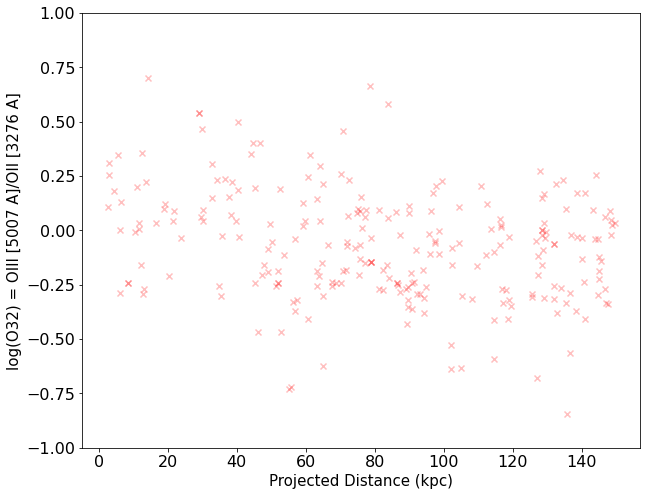

In [24]:
plt.figure(figsize=[10,8])

for each in pair_catalog[np.where(pair_catalog['mass_ratio']<=0.3)]:
    prim = each['primary_ObjID']
    data_entry = secondary_catalog[np.where(secondary_catalog['ObjID'] == prim)]
    if len(data_entry)==1 and data_entry['logMass']<=9.5:
        plt.scatter(each['proj_sep'], np.log10(data_entry['oiii_5007_flux']/data_entry['oii_3726_flux']), marker='x',
                   alpha=0.25, color='red')

plt.ylim([-1,1])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel('Projected Distance (kpc)', fontsize=15)
plt.ylabel('log(O32) = OIII [5007 A]/OII [3276 A]', fontsize=15)
plt.show()


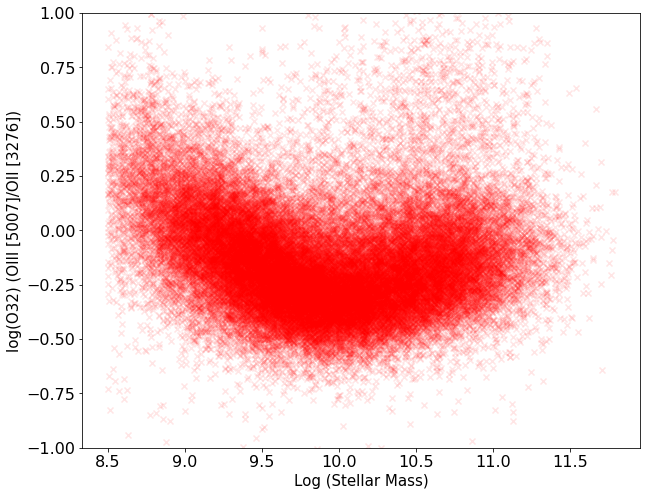

In [17]:
plt.figure(figsize=[10,8])


plt.scatter(primary_catalog['logMass'], np.log10(primary_catalog['oiii_5007_flux']/primary_catalog['oii_3726_flux']),
                                                marker='x', alpha=0.1, color='red')

plt.ylim([-1,1])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel('Log (Stellar Mass)', fontsize=15)
plt.ylabel('log(O32) (OIII [5007]/OII [3276])', fontsize=15)

plt.show()

In [10]:
secondary_catalog[np.where(secondary_catalog['ObjID'] == prim)]

modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,ra,dec,z,ObjID,mode,type,clean,specObjID,Flux_OIII_4958,Flux_OIII_4958_Err,FLux_OIII_5006,FLux_OIII_5006_Err,Flux_OII_3726,Flux_OII_3726_Err,Flux_OII_3728,Flux_OII_3728_Err,oiii_4959_flux,oiii_4959_flux_err,oiii_5007_flux,oiii_5007_flux_err,oii_3729_flux,oii_3729_flux_err,oii_3726_flux,oii_3726_flux_err,logMass,metallicity,age,ssfr,Column1,minlogMass,maxLogMass,SFR,minSFR,maxSFR,Column2
float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
17.53008,15.74332,15.00519,14.6425,14.38323,170.205412930992,0.39017172685771,0.02449388,1237648721763303647,1,3,1,314298455742769152,9.411578,2.22838,26.89022,6.3668,-9999.0,0.0,7639.301,756090.8,11.62529,4.225674,38.76062,4.3464,-485.6782,197.1938,49337.7,25481.7,10.1650898826991,0.00769999995827675,2.16739392280579,-2.55132269859314,10.1,10.04,10.17,0.0,0.0,0.0,0.02
17.53008,15.74332,15.00519,14.6425,14.38323,170.205412930992,0.39017172685771,0.02453966,1237648721763303647,1,3,1,314297899678722048,77.46748,12.46552,221.3356,35.61578,12769.63,1413232.0,6.644185,39372480.0,10.96266,4.996359,43.5415,5.267753,19.12728,13.42573,99.14608,24.43471,10.1495275129751,0.00769999995827675,2.16739392280579,-2.55132269859314,10.1,10.04,10.18,0.0,0.0,0.0,0.02
